In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

#Import Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LinkedIn people.csv to LinkedIn people.csv


In [3]:
linked_df = pd.read_csv('LinkedIn people.csv')
linked_df = linked_df[['id', 'about']]
linked_df = linked_df.dropna().reset_index(drop=True)
linked_df.tail(10)

,id,about
488,john-charest-b4459873,A hands-on senior financial management profess...
489,lahcene-ouchene-789085181,"Dynamique, rigoureux et polyvalent."
490,nickrramos,Prime Named Account Executive at Oracle focusi...
491,andrew-tijerina-12706517b,Helping people: that's the whole reason we wen...
492,mohamed-negm-796334a8,Experienced Senior Sales Executive with a demo...
493,nagylagouveia,"Experiência em eventos, na área de criação e t..."
494,haris-nadeem,Haris started his Mechanical Engineering caree...
495,mohamed-ibrahim-roushdy-cia-b95b067,• Ability to observe and understand business p...
496,aaron-rodzinak-6005403,Responsible for various Systems Engineering du...
497,carlos-soriano-51022049,"Over 12 years in management positions, 15 year..."


In [4]:
len(linked_df)

498

In [6]:
# Not sure if this needs to be run, try without first
# !pip install bert-tensorflow &> /dev/null
# !pip install sentencepiece &> /dev/null

In [9]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.4 MB/s eta 0:00:00


In [10]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
# Importing Roberta
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

(…)lm-roberta-base/resolve/main/config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

(…)ase/resolve/main/sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

(…)roberta-base/resolve/main/tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# Function to get embeddings with roberta
def get_embedding(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True)
    features = model(**encoded_input)
    features = features[0].detach().numpy()
    features_mean = np.mean(features[0], axis=0)
    return features_mean

In [12]:
# Applying the function
linked_df['embeddings'] = linked_df.about.map(lambda x: get_embedding(x))
linked_df

,id,about,embeddings
0,margot-bon-51a04624,Allround Marketing & Communicatie Adviseur met...,"[20.638018, -1.0178225, 52.68325, 44.207428, 5..."
1,mike-dean-8509a193,Experienced Data Manager with a demonstrated h...,"[24.206863, -1.1396507, 56.65467, 47.46871, 59..."
2,gerardludovicwan,As an aspiring junior engineer with 5 years of...,"[25.379213, -1.211581, 58.07665, 48.339317, 58..."
3,kyle-huddle-a67a21b8,Experienced Regional Sales Manager with a demo...,"[24.44487, -1.2044207, 58.45595, 47.802353, 61..."
4,sarah-mcqueen-3bb78218,I worked at Lilly for 28 years in various role...,"[24.891594, -1.1088765, 55.4447, 47.551903, 57..."
...,...,...,...
493,nagylagouveia,"Experiência em eventos, na área de criação e t...","[23.825117, -1.1517123, 55.61286, 45.976215, 5..."
494,haris-nadeem,Haris started his Mechanical Engineering caree...,"[22.19497, -1.0014011, 52.42201, 44.14933, 54...."
495,mohamed-ibrahim-roushdy-cia-b95b067,• Ability to observe and understand business p...,"[22.108566, -1.1455178, 56.754448, 47.03795, 5..."
496,aaron-rodzinak-6005403,Responsible for various Systems Engineering du...,"[21.617657, -1.0355147, 53.89014, 44.42942, 55..."


In [20]:
# Rearranging embeddings column
vectors = np.array(linked_df.embeddings.tolist(), dtype='float')

In [23]:
vectors[0]

array([20.63801765, -1.0178225 , 52.68325043, ..., 36.99329758,
       15.28030968, 28.6838932 ])

In [24]:
from sklearn.manifold import TSNE

# Instantialte tsne, specify cosine metric
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')

In [26]:
# Fit and transform the vectors
embeddings2d = tsne.fit_transform(vectors)

In [31]:
# Create DF
embeddingsdf = pd.DataFrame()
# Add profile ID's
embeddingsdf['id'] = linked_df.id
# Add about column
embeddingsdf['about'] = linked_df.about
# Add x coordinate
embeddingsdf['x'] = embeddings2d[:,0]
# Add y coordinate
embeddingsdf['y'] = embeddings2d[:,1]
# Check
embeddingsdf.head()

,id,about,x,y
0,margot-bon-51a04624,Allround Marketing & Communicatie Adviseur met...,7.586548,-10.116188
1,mike-dean-8509a193,Experienced Data Manager with a demonstrated h...,14.781121,-2.191529
2,gerardludovicwan,As an aspiring junior engineer with 5 years of...,-8.337996,-2.301280
3,kyle-huddle-a67a21b8,Experienced Regional Sales Manager with a demo...,18.168953,-4.653039
4,sarah-mcqueen-3bb78218,I worked at Lilly for 28 years in various role...,-2.750668,0.541819


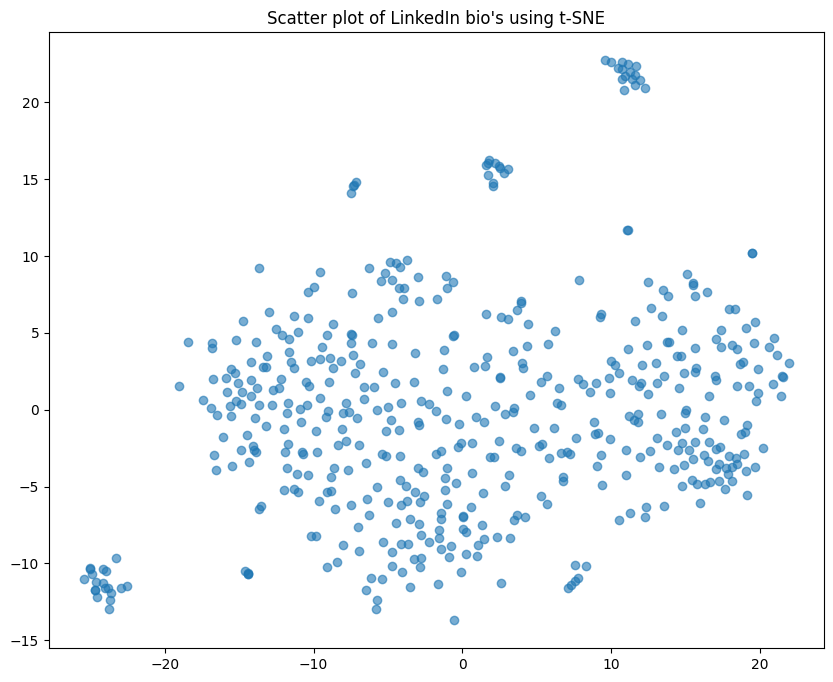

In [55]:
# Set figsize
fig, ax = plt.subplots(figsize=(10,8))
# Scatter points, set alpha low to make points translucent
ax.scatter(embeddingsdf.x, embeddingsdf.y, alpha=.6)
plt.title("Scatter plot of LinkedIn bio's using t-SNE")
plt.show()

In [ ]:
# Code to search keywords in about column
match = embeddingsdf[embeddingsdf.about.str.contains('recherchez')]
match

In [ ]:
# Demonstrating that this cluster in the lower left corner is all spanish speakers
mask_x = (embeddingsdf['x'] >= -30) & (embeddingsdf['x'] <= -20)
mask_y = (embeddingsdf['y'] >= -15) & (embeddingsdf['y'] <= -9)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df

In [ ]:
# Swedish, tiny cluster at -15, -11 X, Y
mask_x = (embeddingsdf['x'] >= -16) & (embeddingsdf['x'] <= -12)
mask_y = (embeddingsdf['y'] >= -13) & (embeddingsdf['y'] <= -9)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df

In [ ]:
# Dutch, small cluster in lower right corner
mask_x = (embeddingsdf['x'] >= 6) & (embeddingsdf['x'] <= 10)
mask_y = (embeddingsdf['y'] >= -13) & (embeddingsdf['y'] <= -8)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df

In [ ]:
# French I believe, top center right
mask_x = (embeddingsdf['x'] >= 1) & (embeddingsdf['x'] <= 4)
mask_y = (embeddingsdf['y'] >= 13) & (embeddingsdf['y'] <= 17)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df

In [ ]:
# Portuguese, top far right
mask_x = (embeddingsdf['x'] >= 8) & (embeddingsdf['x'] <= 13)
mask_y = (embeddingsdf['y'] >= 18) & (embeddingsdf['y'] <= 30)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df

In [ ]:
# Turkish, top center left
mask_x = (embeddingsdf['x'] >= -9) & (embeddingsdf['x'] <= -6)
mask_y = (embeddingsdf['y'] >= 12) & (embeddingsdf['y'] <= 16)

# Apply the masks to filter the DataFrame
result_df = embeddingsdf[mask_x & mask_y]
result_df